# Base Salary Prediction

## Importing libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [130]:
df = pd.read_csv('EmployeesData.csv')
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


## Splitting independent and dependent data

In [131]:
df.dropna()
X = df.iloc[:, [0, 2, 3, 5, 6, 7]].values
y = df.iloc[:, 4].values
X, y

(array([['ABS', 'ABS 85 Administration', 'M', 0.0, 0.0, 'M2'],
        ['ABS', 'ABS 85 Administration', 'M', 0.0, 0.0, 'M3'],
        ['ABS', 'ABS 85 Administration', 'F', 0.0, 0.0, 'M3'],
        ...,
        ['ZAH', 'ZAH 05 Office of Zoning and Administrative Hearings',
         'F', 0.0, 0.0, 'N18'],
        ['ZAH', 'ZAH 05 Zoning and Administrative Hearings', 'F', 0.0,
         1596.27, 'N21'],
        ['ZAH', 'ZAH 05 Zoning and Administrative Hearings', 'F', 0.0,
         0.0, 'N35']], dtype=object),
 array([175873.  , 145613.36, 136970.  , ...,  84365.55,  98228.  ,
        177976.31]))

## Converting categorical data

In [132]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2, 5])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

## Splitting into train and test data

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training model

In [134]:
from sklearn.ensemble import RandomForestRegressor
from tqdm.notebook import tqdm
model = RandomForestRegressor(n_estimators=10, min_samples_leaf=5, min_samples_split=17, random_state=42)
for _ in tqdm(range(1)):
    model.fit(X_train, y_train)

  0%|          | 0/1 [00:00<?, ?it/s]

## Predicting the test dataset

In [135]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis=1))
print(f'R-Squared: {model.score(X_test, y_test)}')

[[ 25412.52  23884.9 ]
 [ 46224.79  70770.73]
 [ 72333.    75038.35]
 ...
 [ 78947.    77735.6 ]
 [106504.   112078.96]
 [ 28246.7   44819.5 ]]
R-Squared: 0.865641269886334


## Visualising

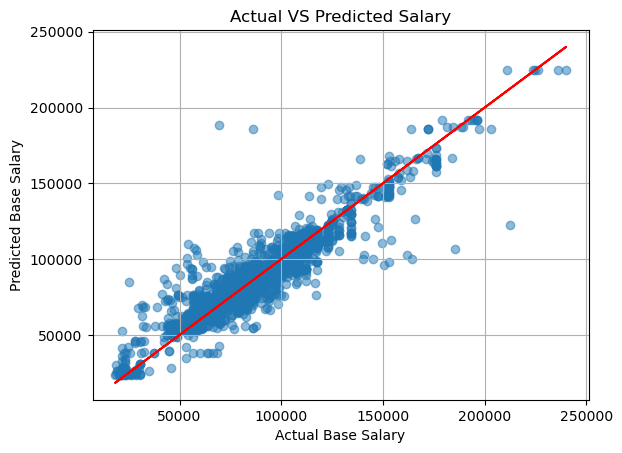

In [136]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_test, color='red')
plt.grid(True)
plt.title('Actual VS Predicted Salary')
plt.xlabel('Actual Base Salary')
plt.ylabel('Predicted Base Salary')
plt.show()